In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")
import pandas
import numpy as np
import matplotlib.pyplot as plt
import os.path

datadir = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteTether/Data_and_Figures/2Bead_interaction/Data/'
plotsdir = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteTether/Data_and_Figures/2Bead_interaction/Plots/'
clrs = ['#2A0944','#3FA796','#FEC260', '#A10035','pink','lightsalmon']
cmap1 = plt.cm.get_cmap('BuPu')
line = 1.5

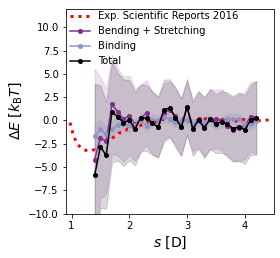

In [7]:
fname = '2BeadInteractionData.txt'
fname2 = '2BeadExpData.txt'

experiment = pandas.read_csv(datadir  + fname2, sep=' ', header = 'infer')
s = experiment.s
interaction = experiment.Exp

simulation = pandas.read_csv(datadir  + fname, sep=' ', header = 'infer')
ss = simulation.s
Excess = simulation.Excess
Bind = simulation.Bind
Excess_std = simulation.Excess_std
Bind_std = simulation.Bind_std

fig,ax = plt.subplots(figsize = (4,3.7))

endAval = 17 #17
Total = np.add(Excess,Bind)
Total_std = np.sqrt(np.add(np.multiply(Bind_std,Bind_std),np.multiply(Excess_std,Excess_std)))
ax.plot(s,interaction,color = 'red',linestyle = ':',linewidth = 3,label = 'Exp. Scientific Reports 2016')
ax.plot(ss[:-endAval],Excess[:-endAval], linestyle = '-',marker = 'o',markersize = 4,linewidth = line, color = cmap1(4/5),label = "Bending + Stretching")
ax.fill_between(ss[:-endAval],np.add(Excess[:-endAval],-Excess_std[:-endAval]),np.add(Excess[:-endAval],Excess_std[:-endAval]), color = cmap1(4/5),alpha = 0.15)
ax.plot(ss[:-endAval],Bind[:-endAval], linestyle = '-',marker = 'o',markersize = 4,linewidth = line, color = cmap1(2.5/5),label = "Binding")
ax.fill_between(ss[:-endAval],np.add(Bind[:-endAval],-Bind_std[:-endAval]),np.add(Bind[:-endAval],Bind_std[:-endAval]), color = cmap1(2.5/5),alpha = 0.15)
ax.plot(ss[:-endAval],Total[:-endAval], linestyle = '-',marker = 'o',markersize = 4,linewidth = line, color = 'black',label = "Total")
ax.fill_between(ss[:-endAval],np.add(Total[:-endAval],-Total_std[:-endAval]),np.add(Total[:-endAval],Total_std[:-endAval]),color = 'black',alpha = 0.15)
ax.set_ylabel(r'$\Delta E$ $[k_{\mathrm{B}}T]$',fontsize = 14)
ax.set_xlabel('$s$ [D]',fontsize  = 14)
ax.legend(frameon=False,loc = [0.,0.70])
ax.set_ylim([-10,+12])
ax.set_xlim([0.9,4.5])
fig.tight_layout()
plotname = '2BeadInteractionProfile.pdf'
fig.savefig(plotsdir+plotname)